In [1]:
import numpy as np


In [6]:
X = np.array([1, 2, 3, 4, 5])
X = X.reshape(-1, 1)
print(X)
y = np.array([3,4,2,5,6])
print(y)


[[1]
 [2]
 [3]
 [4]
 [5]]
[3 4 2 5 6]


In [12]:
np.c_[np.ones(X.shape),X]

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [13]:
#add bias terms
X_b = np.c_[np.ones(X.shape),X]

In [14]:
#initialise parameters
theta = np.random.randn(2) #[intercept, slope]
lr = 0.01 
n_epoch = 1000
m = len(X)

array([[1., 1., 1., 1., 1.],
       [1., 2., 3., 4., 5.]])

In [33]:
#Gradient Descent loop

for epoch in range(n_epoch):
    gradient = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= lr*gradient

print("Parameters (intercept, slope):", theta)

y_pred = X_b.dot(theta)
print("Predictions:", y_pred)
print("Actual :", y)

Parameters (intercept, slope): [1.89997947 0.70000569]
Predictions: [2.59998515 3.29999084 3.99999653 4.70000222 5.4000079 ]
Actual : [3 4 2 5 6]


In [36]:
#gradient descent using numpy

X = np.array([1,2,3,4,5], dtype=np.float32)
y = np.array([2,4,6,8,10], dtype=np.float32)

w = 0.0

#model prediction
def forward(x):
    return w * x

#loss
def loss(y,y_pred):
    return ((y_pred - y)**2).mean()

#gradient
#MSE = 1/N *(w*x - y)**2
#dJ/dw = 1/N *2x(w*x - y

def gradient(x,y,y_pred):
    return np.dot(2*x, y_pred - y ).mean()

print(f"prediction before training f(5): {forward(5):.3f}")

#training

lr = 0.01
n_epoch = 10

for epoch in range(n_epoch):
    y_pred = forward(X)
    l = loss(y,y_pred)
    dw = gradient(X,y,y_pred)
    w -=lr*dw

    if epoch %1 ==0:
        print(f"epoch {epoch+1}: w= {w:.3f}, loss= {l:.8f}")

print(f"prediction after training f(5): {forward(5):.3f}")



prediction before training f(5): 0.000
epoch 1: w= 2.200, loss= 44.00000000
epoch 2: w= 1.980, loss= 0.44000015
epoch 3: w= 2.002, loss= 0.00440001
epoch 4: w= 2.000, loss= 0.00004400
epoch 5: w= 2.000, loss= 0.00000044
epoch 6: w= 2.000, loss= 0.00000000
epoch 7: w= 2.000, loss= 0.00000000
epoch 8: w= 2.000, loss= 0.00000000
epoch 9: w= 2.000, loss= 0.00000000
epoch 10: w= 2.000, loss= 0.00000000
prediction after training f(5): 10.000


In [41]:
#gradient calculation with torch

import torch


X = torch.tensor([1,2,3,4,5], dtype=torch.float32)
y = torch.tensor([2,4,6,8,10], dtype=torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
    return w * x

#loss
def loss(y,y_pred):
    return ((y_pred - y)**2).mean()


print(f"prediction before training f(5): {forward(5):.3f}")

#training

lr = 0.01
n_epoch = 100

for epoch in range(n_epoch):
    y_pred = forward(X)
    l = loss(y,y_pred)
    l.backward() #gradient calculation
    
    #update weight
    with torch.no_grad():
        w -= lr*w.grad
    w.grad.zero_()

    if epoch %10 ==0:
        print(f"epoch {epoch+1}: w= {w:.3f}, loss= {l:.8f}")

print(f"prediction after training f(5): {forward(5):.3f}")



prediction before training f(5): 0.000
epoch 1: w= 0.440, loss= 44.00000000
epoch 11: w= 1.870, loss= 0.30573449
epoch 21: w= 1.989, loss= 0.00212438
epoch 31: w= 1.999, loss= 0.00001476
epoch 41: w= 2.000, loss= 0.00000010
epoch 51: w= 2.000, loss= 0.00000000
epoch 61: w= 2.000, loss= 0.00000000
epoch 71: w= 2.000, loss= 0.00000000
epoch 81: w= 2.000, loss= 0.00000000
epoch 91: w= 2.000, loss= 0.00000000
prediction after training f(5): 10.000


In [51]:
#1. design Model(input, output size, forward pass)
#2. construct loss and optimizer
#3. training loop
#   - forward pass : compute prediction
#   - backward pass : compute gradient
#   - update weights

import torch
import torch.nn as nn


X = torch.tensor([1,2,3,4,5], dtype=torch.float32)
y = torch.tensor([2,4,6,8,10], dtype=torch.float32)


w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
    return w * x

print(f"prediction before training f(5): {forward(5):.3f}")

#training

lr = 0.01
n_epoch = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr)

for epoch in range(n_epoch):
    y_pred = forward(X)
    l = loss(y,y_pred)
    l.backward() #gradient calculation
    
    optimizer.step()
    optimizer.zero_grad()

    if epoch %10 ==0:
        print(f"epoch {epoch+1}: w= {w:.3f}, loss= {l:.8f}")

print(f"prediction after training f(5): {forward(5):.3f}")


prediction before training f(5): 0.000
epoch 1: w= 0.440, loss= 44.00000000
epoch 11: w= 1.870, loss= 0.30573449
epoch 21: w= 1.989, loss= 0.00212438
epoch 31: w= 1.999, loss= 0.00001476
epoch 41: w= 2.000, loss= 0.00000010
epoch 51: w= 2.000, loss= 0.00000000
epoch 61: w= 2.000, loss= 0.00000000
epoch 71: w= 2.000, loss= 0.00000000
epoch 81: w= 2.000, loss= 0.00000000
epoch 91: w= 2.000, loss= 0.00000000
prediction after training f(5): 10.000


In [52]:
#1. design Model(input, output size, forward pass)
#2. construct loss and optimizer
#3. training loop
#   - forward pass : compute prediction
#   - backward pass : compute gradient
#   - update weights

import torch
import torch.nn as nn


X = torch.tensor([1,2,3,4,5], dtype=torch.float32).view(-1,1)
y = torch.tensor([2,4,6,8,10], dtype=torch.float32).view(-1,1)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features )

input_size = n_features
output_size = n_features
#model prediction
model = nn.Linear(input_size, output_size)

print(f"prediction before training f(5): {model(X_test).item():.3f}")

#training

lr = 0.01
n_epoch = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

for epoch in range(n_epoch):
    y_pred = model(X)
    l = loss(y,y_pred)
    l.backward() #gradient calculation
    
    optimizer.step()
    optimizer.zero_grad()

    if epoch %10 ==0:
        [w,b] = model.parameters()
        print(f"epoch {epoch+1}: w= {w[0][0].item():.3f}, loss= {l:.8f}")

print(f"prediction after training f(5): {model(X_test).item():.3f}")


5 1
prediction before training f(5): -1.101
epoch 1: w= 0.132, loss= 52.08150101
epoch 11: w= 1.580, loss= 0.47390956
epoch 21: w= 1.687, loss= 0.22518058
epoch 31: w= 1.703, loss= 0.20944989
epoch 41: w= 1.714, loss= 0.19572841
epoch 51: w= 1.723, loss= 0.18290977
epoch 61: w= 1.732, loss= 0.17093097
epoch 71: w= 1.741, loss= 0.15973656
epoch 81: w= 1.750, loss= 0.14927521
epoch 91: w= 1.758, loss= 0.13949922
prediction after training f(5): 9.674


In [53]:
#1. design Model(input, output size, forward pass)
#2. construct loss and optimizer
#3. training loop
#   - forward pass : compute prediction
#   - backward pass : compute gradient
#   - update weights

import torch
import torch.nn as nn


X = torch.tensor([1,2,3,4,5], dtype=torch.float32).view(-1,1)
y = torch.tensor([2,4,6,8,10], dtype=torch.float32).view(-1,1)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features )

input_size = n_features
output_size = n_features
#model prediction
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f"prediction before training f(5): {model(X_test).item():.3f}")

#training

lr = 0.01
n_epoch = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

for epoch in range(n_epoch):
    y_pred = model(X)
    l = loss(y,y_pred)
    l.backward() #gradient calculation
    
    optimizer.step()
    optimizer.zero_grad()

    if epoch %10 ==0:
        [w,b] = model.parameters()
        print(f"epoch {epoch+1}: w= {w[0][0].item():.3f}, loss= {l:.8f}")

print(f"prediction after training f(5): {model(X_test).item():.3f}")


5 1
prediction before training f(5): -4.514
epoch 1: w= -0.118, loss= 95.94094086
epoch 11: w= 1.837, loss= 0.43454036
epoch 21: w= 1.969, loss= 0.00308290
epoch 31: w= 1.978, loss= 0.00106073
epoch 41: w= 1.980, loss= 0.00098303
epoch 51: w= 1.980, loss= 0.00091862
epoch 61: w= 1.981, loss= 0.00085846
epoch 71: w= 1.982, loss= 0.00080223
epoch 81: w= 1.982, loss= 0.00074970
epoch 91: w= 1.983, loss= 0.00070060
prediction after training f(5): 9.977


### Linea Regression using pytorch Implementation

epoch 10: loss = 4379.29443
epoch 20: loss = 3267.79199
epoch 30: loss = 2463.46338
epoch 40: loss = 1880.80127
epoch 50: loss = 1458.30371
epoch 60: loss = 1151.66589
epoch 70: loss = 928.92999
epoch 80: loss = 767.01428
epoch 90: loss = 649.22784
epoch 100: loss = 563.48792


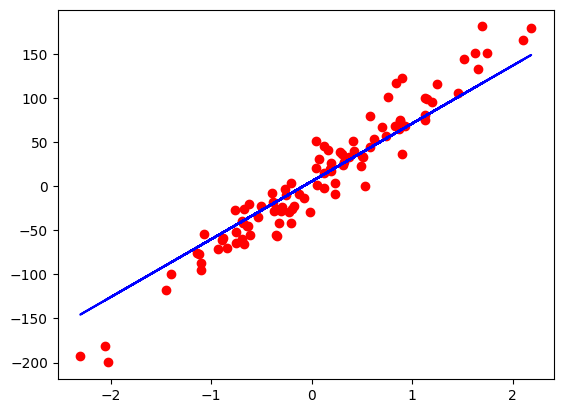

In [3]:
#1. design Model(input, output size, forward pass)
#2. construct loss and optimizer
#3. training loop
#   - forward pass : compute prediction
#   - backward pass : compute gradient
#   - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#0. Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).view(-1,1)

n_samples, n_features = X.shape

#1. model
input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size)

#loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

#3. training loop
n_epochs = 100
for epoch in range(n_epochs):
    #forward pass
    y_pred = model(X)
    loss = criterion(y_pred,y)
    #backward pass
    loss.backward()
    #update weight
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%10==0:
        print(f"epoch {epoch+1}: loss = {loss.item():.5f}")

pred = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, pred,'b')
plt.show()





### Logistic Regression

In [5]:
#1. design Model(input, output size, forward pass)
#2. construct loss and optimizer
#3. training loop
#   - forward pass : compute prediction
#   - backward pass : compute gradient
#   - update weights

from tkinter import N
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#0. dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=1234)
#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(-1,1)

#1. model
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
model = LogisticRegression(n_features)

#2. loss and optimizer
lr = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

# training
n_epochs = 100
for epoch in range(n_epochs):

    #forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)

    #backward pass, compute gradient
    loss.backward()

    #update weights
    optimizer.step()
    #zero gradient
    optimizer.zero_grad()

    if (epoch+1)%10==0:
        print(f"epoch {epoch+1}: loss={loss.item():.5f}")
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum()/len(y_test)
    print(f"acc={acc:.3f}")




epoch 10: loss=0.61774
epoch 20: loss=0.50940
epoch 30: loss=0.44129
epoch 40: loss=0.39415
epoch 50: loss=0.35921
epoch 60: loss=0.33203
epoch 70: loss=0.31012
epoch 80: loss=0.29198
epoch 90: loss=0.27665
epoch 100: loss=0.26347
acc=0.895


### Dataset and DataLoader

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WindeDataset(Dataset):

    def __init__(self):
        xy = np.loadtxt("data/wine.csv",delimiter=',',dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

dataset = WindeDataset()

dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)
dataiter = iter(dataloader)
data = next(dataiter)
data


[tensor([[1.3640e+01, 3.1000e+00, 2.5600e+00, 1.5200e+01, 1.1600e+02, 2.7000e+00,
          3.0300e+00, 1.7000e-01, 1.6600e+00, 5.1000e+00, 9.6000e-01, 3.3600e+00,
          8.4500e+02],
         [1.3240e+01, 2.5900e+00, 2.8700e+00, 2.1000e+01, 1.1800e+02, 2.8000e+00,
          2.6900e+00, 3.9000e-01, 1.8200e+00, 4.3200e+00, 1.0400e+00, 2.9300e+00,
          7.3500e+02],
         [1.3240e+01, 3.9800e+00, 2.2900e+00, 1.7500e+01, 1.0300e+02, 2.6400e+00,
          2.6300e+00, 3.2000e-01, 1.6600e+00, 4.3600e+00, 8.2000e-01, 3.0000e+00,
          6.8000e+02],
         [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
          2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
          1.0800e+03]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.]])]

In [3]:
dataset[1]

(tensor([1.3200e+01, 1.7800e+00, 2.1400e+00, 1.1200e+01, 1.0000e+02, 2.6500e+00,
         2.7600e+00, 2.6000e-01, 1.2800e+00, 4.3800e+00, 1.0500e+00, 3.4000e+00,
         1.0500e+03]),
 tensor([1.]))

In [9]:
#training loop

n_epochs = 2
batch_size = 4
n_samples = len(dataset)
print(n_samples)
n_iter = math.ceil(n_samples/batch_size)

for epoch in range(n_epochs):
    for i,(inputs,labels) in enumerate(dataloader):

        if (i+1)%5==0:
            print(f"epoch {epoch+1}/{n_epochs}: step={i+1}/{n_iter}, input:{inputs.shape}")

178
epoch 1/2: step=5/45, input:torch.Size([4, 13])
epoch 1/2: step=10/45, input:torch.Size([4, 13])
epoch 1/2: step=15/45, input:torch.Size([4, 13])
epoch 1/2: step=20/45, input:torch.Size([4, 13])
epoch 1/2: step=25/45, input:torch.Size([4, 13])
epoch 1/2: step=30/45, input:torch.Size([4, 13])
epoch 1/2: step=35/45, input:torch.Size([4, 13])
epoch 1/2: step=40/45, input:torch.Size([4, 13])
epoch 1/2: step=45/45, input:torch.Size([2, 13])
epoch 2/2: step=5/45, input:torch.Size([4, 13])
epoch 2/2: step=10/45, input:torch.Size([4, 13])
epoch 2/2: step=15/45, input:torch.Size([4, 13])
epoch 2/2: step=20/45, input:torch.Size([4, 13])
epoch 2/2: step=25/45, input:torch.Size([4, 13])
epoch 2/2: step=30/45, input:torch.Size([4, 13])
epoch 2/2: step=35/45, input:torch.Size([4, 13])
epoch 2/2: step=40/45, input:torch.Size([4, 13])
epoch 2/2: step=45/45, input:torch.Size([2, 13])


In [11]:
# torchvision.datasets.MNIST()
# torchvision.datasets.CIFAR10()
# ...

### Dataset Transform

In [ ]:
# On Images
# ---------
# CenterCrop, Grayscale, Pad, RandomAffine
# RandomCrop, RandomHorizontalFlip, RandomRotation
# Resize, Scale

# On Tensors
# ----------
# LinearTransformation, Normalize, RandomErasing

# Conversion
# ----------
# ToPILImage: from tensor or ndrarray
# ToTensor : from numpy.ndarray or PILImage

# Generic
# -------
# Use Lambda 

# Custom
# ------
# Write own class

# Compose multiple Transforms
# ---------------------------
# composed = transforms.Compose([Rescale(256),
#                                RandomCrop(224)])

import torch
import torchvision

dataset = torchvision.datasets.MNIST(
    root='data/', transform= torchvision.transforms.ToTensor()
)

In [13]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WindeDataset(Dataset):

    def __init__(self, transform = None):
        xy = np.loadtxt("data/wine.csv",delimiter=',',dtype=np.float32, skiprows=1)
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.n_samples = xy.shape[0]

        self.transorm = transform
    
    def __getitem__(self, index):
        sample =  self.x[index], self.y[index]
        return self.transorm(sample) if self.transorm else sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inp, out = sample
        return torch.from_numpy(inp), torch.from_numpy(out)

class MulTransform:
    def __init__(self,factor):
        self.factor = factor

    def __call__(self, sample):
        inp, out = sample
        return self.factor* inp, out

dataset = WindeDataset(transform=ToTensor())

firstdata = dataset[0]
print(firstdata)

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WindeDataset(transform=composed)
firstdata = dataset[0]
print(firstdata)

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))
(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]), tensor([1.]))


### Softmax and Cross Entropy

In [15]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0, keepdims=True)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print(f"softmax ouput: {outputs}")

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim = 0)
print(outputs)


softmax ouput: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


### Cross entropy

In [16]:
import torch
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

y = np.array([1,0, 0])
y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(y,y_pred_good)
l2 = cross_entropy(y,y_pred_bad)

print(l1, l2)


0.35667494393873245 2.3025850929940455


In [20]:
#nn.CrossEntropyLoss already apply nn.LogSoftmax + nn.NLLLoss(negative log likelihood loss)
#no softmax in last layer
#y has class label. not one hot encoded
#y_pred has raw score(logits) no softmax

loss = nn.CrossEntropyLoss()
y = torch.tensor([0])
# nsamples*nclasses
y_pred_good = torch.tensor([[2.0,1.0,0.1]])
y_pred_bad = torch.tensor([[0.5,2.0,0.3]])

l1 = loss(y_pred_good,y)
l2 = loss(y_pred_bad,y)
print(l1.item(), l2.item())

a_, prediction1 = torch.max(y_pred_good, 1)
b_, prediction2 = torch.max(y_pred_bad, 1)
print(a_, prediction1 )
print(b_, prediction2)


0.4170299470424652 1.840616226196289
tensor([2.]) tensor([0])
tensor([2.]) tensor([1])


In [ ]:
import torch
import torch.nn as nn

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()

In [26]:
#activation functions

import torch.nn.functional as F

a = F.leaky_relu(x)

### Feedforward Neural Network

torch.Size([100, 1, 28, 28]) torch.Size([100])


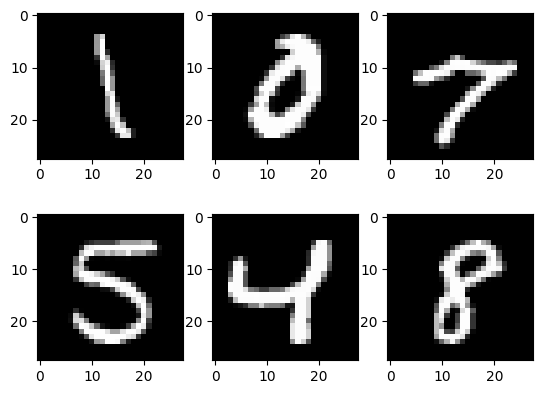

In [34]:
#MNIST 
#DataLoader, Transformation
#MLP, activation function
#Loss and Optimizer
#Training Loop(batch training)
#Model evaluation
#GPU support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784 #28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
lr = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root="data/", transform = transforms.ToTensor(), train = True, download=True)
test_dataset = torchvision.datasets.MNIST(root = "data/", transform = transforms.ToTensor(), train = False )

train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)

samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='grey')

plt.show()

In [39]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        return self.l2(self.relu(self.l1(x)))

model = NeuralNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):

    for i,(images, labels) in enumerate(train_loader):
        #100,1,28,28--> 100, 784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        #forward
        pred = model(images)
        loss = criterion(pred, labels)

        #optimizer

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f"epoch: {epoch}/{num_epochs}, step: {i+1}/{n_total_steps}, loss: {loss:.5f}")

#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        pred = model(images)
        _, predictions = torch.max(pred, dim = 1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()

    acc = 100* n_correct / n_samples
    print(f"acc: {acc}")
        




epoch: 0/2, step: 100/600, loss: 0.42201
epoch: 0/2, step: 200/600, loss: 0.29273
epoch: 0/2, step: 300/600, loss: 0.40473
epoch: 0/2, step: 400/600, loss: 0.36468
epoch: 0/2, step: 500/600, loss: 0.35056
epoch: 0/2, step: 600/600, loss: 0.18597
epoch: 1/2, step: 100/600, loss: 0.18173
epoch: 1/2, step: 200/600, loss: 0.36748
epoch: 1/2, step: 300/600, loss: 0.11328
epoch: 1/2, step: 400/600, loss: 0.09591
epoch: 1/2, step: 500/600, loss: 0.06227
epoch: 1/2, step: 600/600, loss: 0.15223
acc: 95.48
